### COVID-19
### UPDATE by Weeks 
#### started from officially Day 1 (Wednesday 22.01.2020) given in data set and on for every next 7 days)
### Total infected cases, total fatalities, total recovered

In [1]:
from covid import *
%matplotlib inline

Start importing files in folder
None
None
Start importing single data  ./COVID-19/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv
Start importing USA-data  ./COVID-19/csse_covid_19_data/csse_covid_19_daily_reports_us/
None
Start importing single data  ./COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Start importing single data  ./COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
Start importing single data  ./COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv


/home/edvs1/lphan/.conda/envs/aic/lib/python3.7/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


### Number of covid-19 outbreak days 

In [2]:
rcParams['figure.figsize'] = 20, 6
len(x_dat)

346

In [3]:
updated_date=files[-1].split('.')[0]
updated_date

'12-31-2020'

### Total CONFIRMED cases in the World changed by week


Week: 1 with lowest confirmed cases 1438

Week: 47 with highest confirmed cases 5177494

Average confirmed by Week until now:  1668488.92


,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
Total Confirmed changed by Week,1438,12038,37121,69032,78599,86012,105832,156086,304686,660666,...,46144706,50069698,54121862,58268894,62355818,66619584,71797078,76298735,80364202,83424446
Number of Confirmed every Week,1438,10600,25083,31911,9567,7413,19820,50254,148600,355980,...,3417544,3924992,4052164,4147032,4086924,4263766,5177494,4501657,4065467,3060244


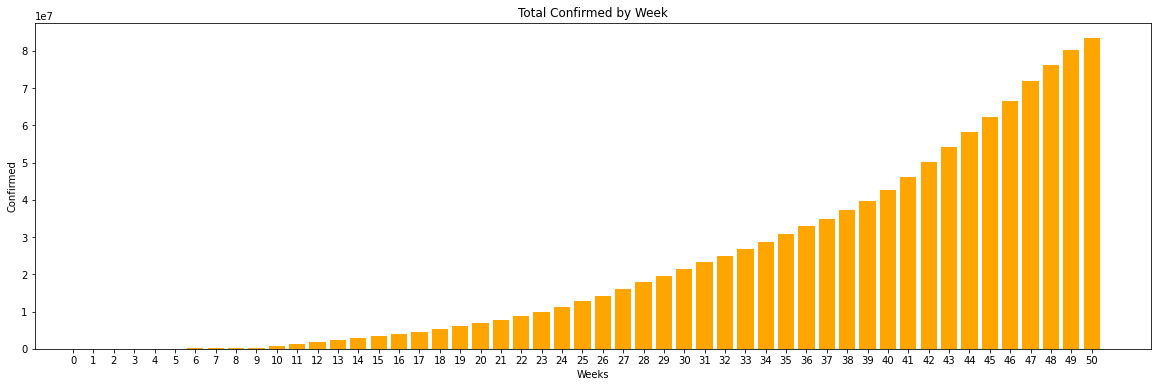

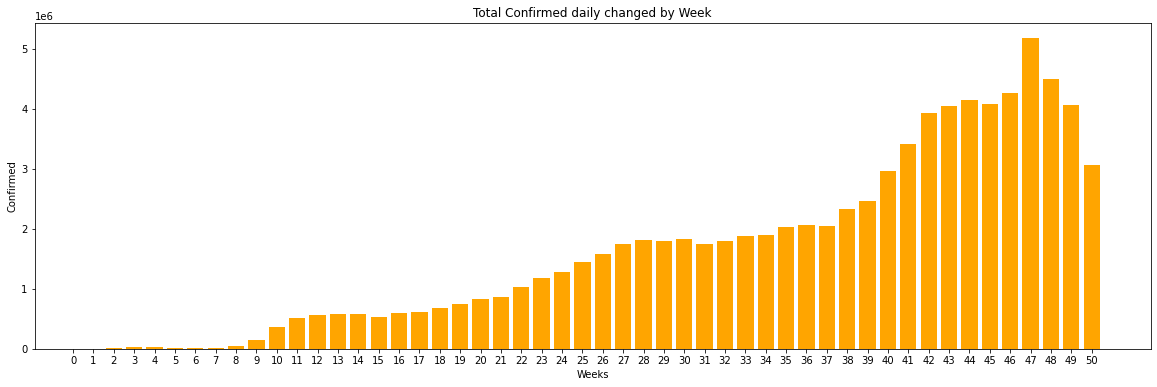

In [4]:
# convert to DataFrame
x_weeks = [week for week, value in confirmedByWeek]
y_cases_total = [value for week, value in confirmedByWeek]
y_cases_byweek = [confirmedByWeek[0][1]]+[confirmedByWeek[i+1][1]-confirmedByWeek[i][1] for i in range(len(confirmedByWeek)-1)]

weeks = np.arange(1, max(x_weeks)+1, 1)
confirmedweeks = pd.DataFrame(columns=x_weeks, index=['Total Confirmed changed by Week', 'Number of Confirmed every Week'])
for week in weeks:
    confirmedweeks[week] = [y_cases_total[week-1], y_cases_byweek[week-1]]

# Plot total confirmed
plt.figure(1)
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
plt.bar(x_weeks, y_cases_total, color='Orange')
plt.xlabel('Weeks')
plt.ylabel('Confirmed')
plt.title("Total Confirmed by Week")
plt.savefig('output/week_totalconfirmed.jpg')

# Plot number of confirmed every week
plt.figure(2)
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
plt.bar(x_weeks, y_cases_byweek, color='Orange')
plt.xlabel('Weeks')
plt.ylabel('Confirmed')
plt.title("Total Confirmed daily changed by Week")
plt.savefig('output/week_totalconfirmed_weekly.jpg')

print("\nWeek:", np.argmin(y_cases_byweek)+1, "with lowest confirmed cases", y_cases_byweek[np.argmin(y_cases_byweek)])
print("\nWeek:", np.argmax(y_cases_byweek)+1, "with highest confirmed cases", y_cases_byweek[np.argmax(y_cases_byweek)])
print("\nAverage confirmed by Week until now: ", np.mean(y_cases_byweek))
confirmedweeks

# note: plot displays data on x-axis start at index 1, and data in Python collected at index 0, that's why +1

### Total FATALITIES cases in the World changed by week


Week: 1 with lowest Fatalities cases 42.0

Week: 48 with highest Fatalities cases 80423

Average Fatalities by Week until now:  36362.32


,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
Total Fatalities changed by Week,42.0,259.0,806,1666,2458,2941,3563,5819,12973,30650,...,1196146,1251673,1313512,1381629,1452974,1528903,1605103,1685526,1757722,1818116
Number of Fatalities every Week,42.0,217.0,547,860,792,483,622,2256,7154,17677,...,45491,55527,61839,68117,71345,75929,76200,80423,72196,60394


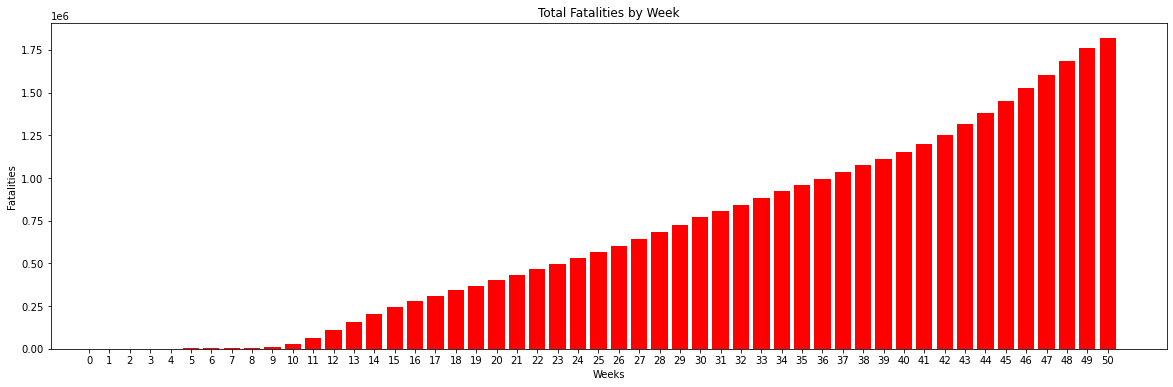

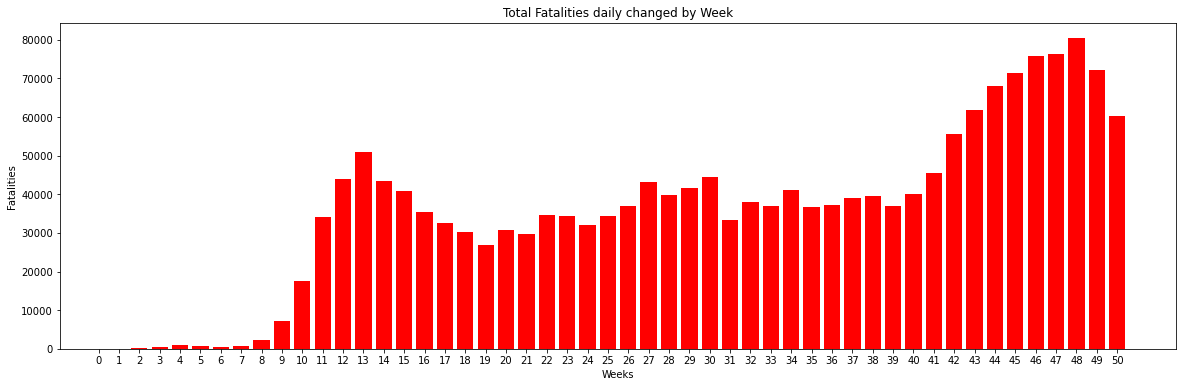

In [5]:
# convert to DataFrame
x_weeks = [week for week, value in deathsByWeek]
y_cases_total_deaths = [value for week, value in deathsByWeek]
y_cases_byweek_deaths = [deathsByWeek[0][1]]+[deathsByWeek[i+1][1]-deathsByWeek[i][1] for i in range(len(deathsByWeek)-1)]

weeks = np.arange(1, max(x_weeks)+1, 1)
confirmedweeks_deaths = pd.DataFrame(columns=x_weeks, index=['Total Fatalities changed by Week', 'Number of Fatalities every Week'])
for week in weeks:
    confirmedweeks_deaths[week] = [y_cases_total_deaths[week-1], y_cases_byweek_deaths[week-1]]

# Plot total confirmed
plt.figure(1)
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
plt.bar(x_weeks, y_cases_total_deaths, color='Red')
plt.xlabel('Weeks')
plt.ylabel('Fatalities')
plt.title("Total Fatalities by Week")
plt.savefig('output/week_totalfatalities.jpg')

# Plot number of confirmed every week
plt.figure(2)
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
plt.bar(x_weeks, y_cases_byweek_deaths, color='Red')
plt.xlabel('Weeks')
plt.ylabel('Fatalities')
plt.title("Total Fatalities daily changed by Week")
plt.savefig('output/week_totalfatalities_weekly.jpg')

print("\nWeek:", np.argmin(y_cases_byweek_deaths)+1, "with lowest Fatalities cases", y_cases_byweek_deaths[np.argmin(y_cases_byweek_deaths)])
print("\nWeek:", np.argmax(y_cases_byweek_deaths)+1, "with highest Fatalities cases", y_cases_byweek_deaths[np.argmax(y_cases_byweek_deaths)])
print("\nAverage Fatalities by Week until now: ", np.mean(y_cases_byweek_deaths))
confirmedweeks_deaths

# note: plot displays data on x-axis start at index 1, and data in Python collected at index 0, that's why +1

### Total RECOVERED cases in the World changed by week


Week: 13 with lowest Recovered cases -8072228.0

Week: 12 with highest Recovered cases 8469859.0

Average Recovered by Week until now:  1098587.24


,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
Total Recovered changed by Week,39.0,284.0,2616,9395,22886,39781,58357,72621,91654,139404,...,30847553.0,32807319.0,34759832.0,37243760.0,39831860.0,42860561.0,46927624.0,49976738.0,52883903.0,54929362.0
Number of Recovered every Week,39.0,245.0,2332,6779,13491,16895,18576,14264,19033,47750,...,2056920.0,1959766.0,1952513.0,2483928.0,2588100.0,3028701.0,4067063.0,3049114.0,2907165.0,2045459.0


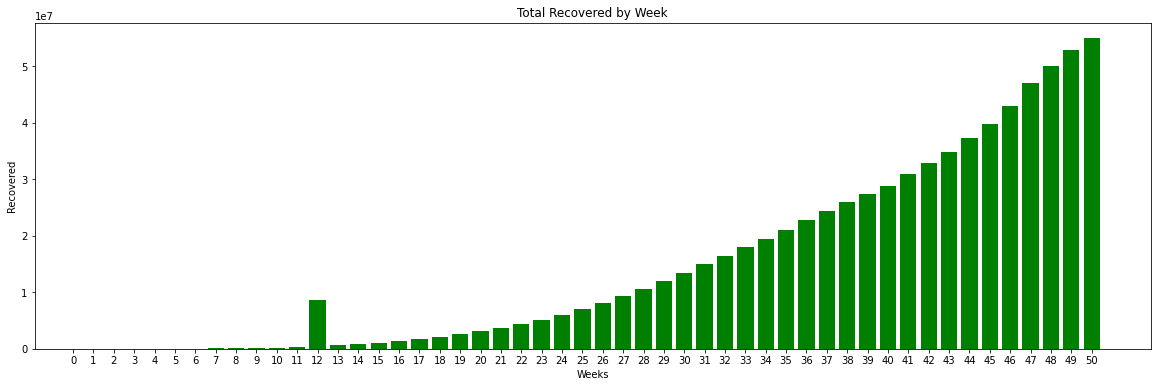

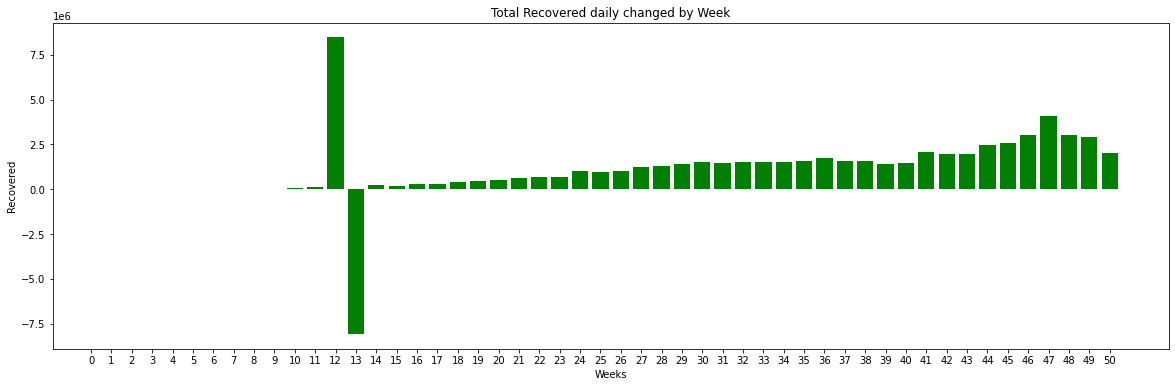

In [6]:
# convert to DataFrame
x_weeks = [week for week, value in recoveredByWeek]
y_cases_total_recovered = [value for week, value in recoveredByWeek]
y_cases_byweek_recovered = [recoveredByWeek[0][1]]+[recoveredByWeek[i+1][1]-recoveredByWeek[i][1] for i in range(len(recoveredByWeek)-1)]

weeks = np.arange(1, max(x_weeks)+1, 1)
confirmedweeks_recovered = pd.DataFrame(columns=x_weeks, index=['Total Recovered changed by Week', 'Number of Recovered every Week'])
for week in weeks:
    confirmedweeks_recovered[week] = [y_cases_total_recovered[week-1], y_cases_byweek_recovered[week-1]]

# Plot total recovered
plt.figure(1)
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
plt.bar(x_weeks, y_cases_total_recovered, color='Green')
plt.xlabel('Weeks')
plt.ylabel('Recovered')
plt.title("Total Recovered by Week")
plt.savefig('output/week_totalrecovered.jpg')

# Plot number of recovered every week
plt.figure(2)
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
plt.bar(x_weeks, y_cases_byweek_recovered, color='Green')
plt.xlabel('Weeks')
plt.ylabel('Recovered')
plt.title("Total Recovered daily changed by Week")
plt.savefig('output/week_totalrecovered_weekly.jpg')

print("\nWeek:", np.argmin(y_cases_byweek_recovered)+1, "with lowest Recovered cases", y_cases_byweek_recovered[np.argmin(y_cases_byweek_recovered)])
print("\nWeek:", np.argmax(y_cases_byweek_recovered)+1, "with highest Recovered cases", y_cases_byweek_recovered[np.argmax(y_cases_byweek_recovered)])
print("\nAverage Recovered by Week until now: ", np.mean(y_cases_byweek_recovered))
confirmedweeks_recovered

# note: plot displays data on x-axis start at index 1, and data in Python collected at index 0, that's why +1